#3장 신경망

3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [2]:
def step_function(x):
  y = x > 0
  return y.astype(int)

In [3]:
import numpy as np

In [4]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

3.2.3 계단 함수의 그래프

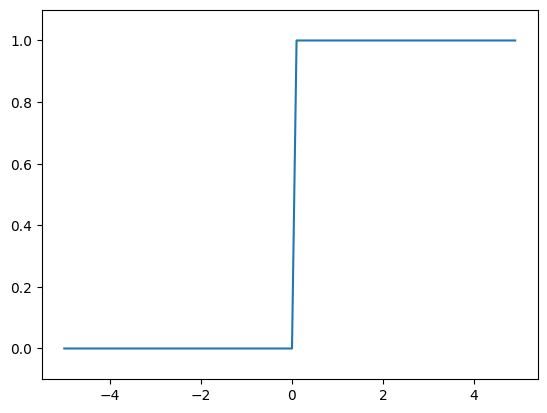

In [6]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [9]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [10]:
1.0/t

array([1.        , 0.5       , 0.33333333])

<function matplotlib.pyplot.show(close=None, block=None)>

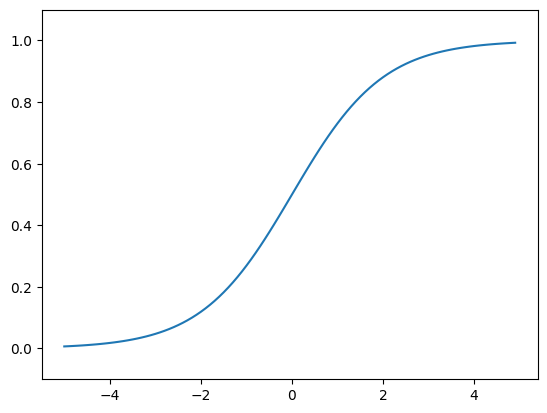

In [11]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show

3.2.7 ReLU 함수

In [12]:
def relu(x):
  return np.maximum(0, x)

3.3.1 다차원 배열


In [13]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [14]:
np.ndim(A)

1

In [15]:
A.shape

(4,)

In [16]:
A.shape[0]

4

In [17]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [18]:
np.ndim(B)

2

In [19]:
B.shape

(3, 2)

3.3.2 행렬의 곱

In [20]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [21]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [22]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [23]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [24]:
B = np.array([[1,2], [3,4], [5,6]])
B.shape

(3, 2)

In [25]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [26]:
C = np.array([[1,2], [3,4]])
C.shape

(2, 2)

In [27]:
A.shape

(2, 3)

In [28]:
np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [29]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape

(3, 2)

In [30]:
B = np.array([7,8])
B.shape

(2,)

In [31]:
np.dot(A,B)

array([23, 53, 83])

3.3.3 신경망에서의 행렬 곱

In [32]:
X = np.array([1,2])

In [33]:
X.shape

(2,)

In [34]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [35]:
W.shape

(2, 3)

In [36]:
Y = np.dot(X, W)

In [37]:
print(Y)

[ 5 11 17]


3.4.2 각 층의 신호 전달 구현하기

In [38]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [39]:
A1 = np.dot(X, W1) + B1

In [40]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [41]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.5]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [42]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

3.4.3 구현 정리

In [43]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [44]:
a = np.array([0.3, 2.9, 4.0])

In [45]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [46]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [47]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [48]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [49]:
a = np.array([1010, 1000, 999])
np.exp(a) / np.sum(np.exp(a))

/tmp/ipython-input-2837122526.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/tmp/ipython-input-2837122526.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [50]:
c = np.max(a)

In [51]:
a - c

array([  0, -10, -11])

In [52]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99937902e-01, 4.53971105e-05, 1.67006637e-05])

In [53]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

3.5.3 소프트맥스 함수의 특징

In [54]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)

In [55]:
print(y)

[0.01821127 0.24519181 0.73659691]


In [56]:
np.sum(y)

np.float64(1.0)

3.6.1 MNIST 데이터셋

In [57]:
import sys, os

from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [58]:
from PIL import Image
import numpy as np
import pickle

def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

(x_train, t_train), (x_test, t_test) = mnist.load_data()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(28, 28)
(28, 28)


In [61]:
from google.colab import userdata
import os
TOKEN = userdata.get('GH_TOKEN')
USERNAME = 'yangjaehoon'
REPO = 'DCLab_study'

%cd '/content/drive/MyDrive/Colab Notebooks/DCLab_study/DeepLearning_from_Scratch'

TOKEN = userdata.get('GH_TOKEN')
USERNAME = 'yangjaehoon'
REPO = 'DCLab_study'

!git init
!git config --global user.email "lljhms@naver.com"
!git config --global user.name "yangjaehoon"
!git remote set-url origin https://{TOKEN}@github.com/{USERNAME}/{REPO}.git
!git add 3_neuralnetwork.ipynb
!git commit -m '3장 뉴럴 네트워크.'
!git push origin main

/content/drive/MyDrive/Colab Notebooks/DCLab_study/DeepLearning_from_Scratch
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab Notebooks/DCLab_study/DeepLearning_from_Scratch/.git/
error: No such remote 'origin'
[master (root-commit) c676f92] 3장 뉴럴 네트워크.
 1 file changed, 1 insertion(+)
 create mode 100644 3_neuralnetwork.ipynb
error: src refspec main does not match any
error: failed to push some refs to 'origin'
